# `JAMBOREE EDUCATION - LINEAR REGRESSION`

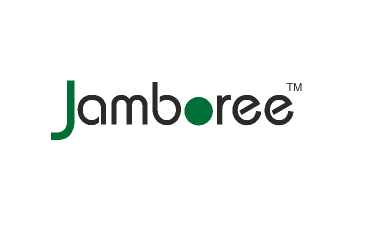

### _Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort._

### _They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college._

### _This feature estimates the chances of graduate admission from an Indian perspective._

## Aim of the Project:-

### _Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given                                                                           the rest of the variables._

## _Column Profiling:_

Serial No. (Unique row ID)

GRE Scores (out of 340)

TOEFL Scores (out of 120)

University Rating (out of 5)

Statement of Purpose and Letter of Recommendation Strength(SOP) (out of 5)

Research Experience (either 0 or 1)

Chance of Admit (ranging from 0 to 1)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import math
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, svm
from statsmodels.formula.api import ols
import scipy as sp

In [2]:
url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv'
jamb = pd.read_csv(url)
jam_data = jamb.copy(deep=True)

In [3]:
jamb

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
# column and rows in the dataset
jamb.shape

(500, 9)

In [5]:
# Null values in the dataset
jamb.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
# unique values in the dataset
for col in jamb:
    print(f'Number of unique values in the {col} column:',jamb[col].nunique(),'.')

Number of unique values in the Serial No. column: 500 .
Number of unique values in the GRE Score column: 49 .
Number of unique values in the TOEFL Score column: 29 .
Number of unique values in the University Rating column: 5 .
Number of unique values in the SOP column: 9 .
Number of unique values in the LOR  column: 9 .
Number of unique values in the CGPA column: 184 .
Number of unique values in the Research column: 2 .
Number of unique values in the Chance of Admit  column: 61 .


In [7]:
# Duplicate values in the dataset
jamb.duplicated().sum()

0

In [8]:
jamb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
jamb.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
jamb.drop(columns='Serial No.',inplace=True)

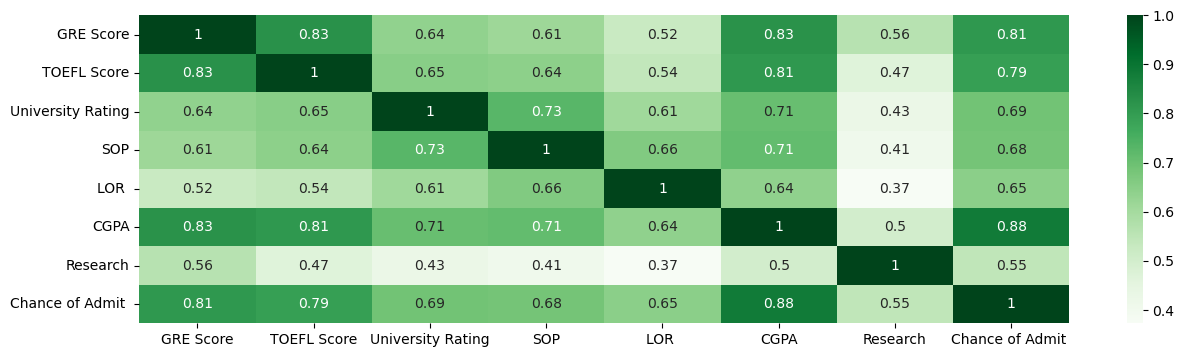

In [11]:
jamb_corr = jamb.corr()
plt.figure(figsize=(15,4))
sns.heatmap(jamb_corr,annot=True, cmap='Greens')
plt.show()

### *_Observations_*:-

    -Chance of Admit shows strong correlation with GRE Score, TOEFL Score and CGPA.
    - Research shows 0.5 correlation with GRE Score, CGPA as well as chance of Admit meaning researchers are 
    - SOP is increasing with LOR.
    - GRE Score and TOEFL Score share a strong correlation meaning that students who are performing well in GRE are also doing doing well 
    with TOEFL.
    - CGPA shares a strong correlation with GRE as well as TOEFL Score as better scores increses CGPA of a student.

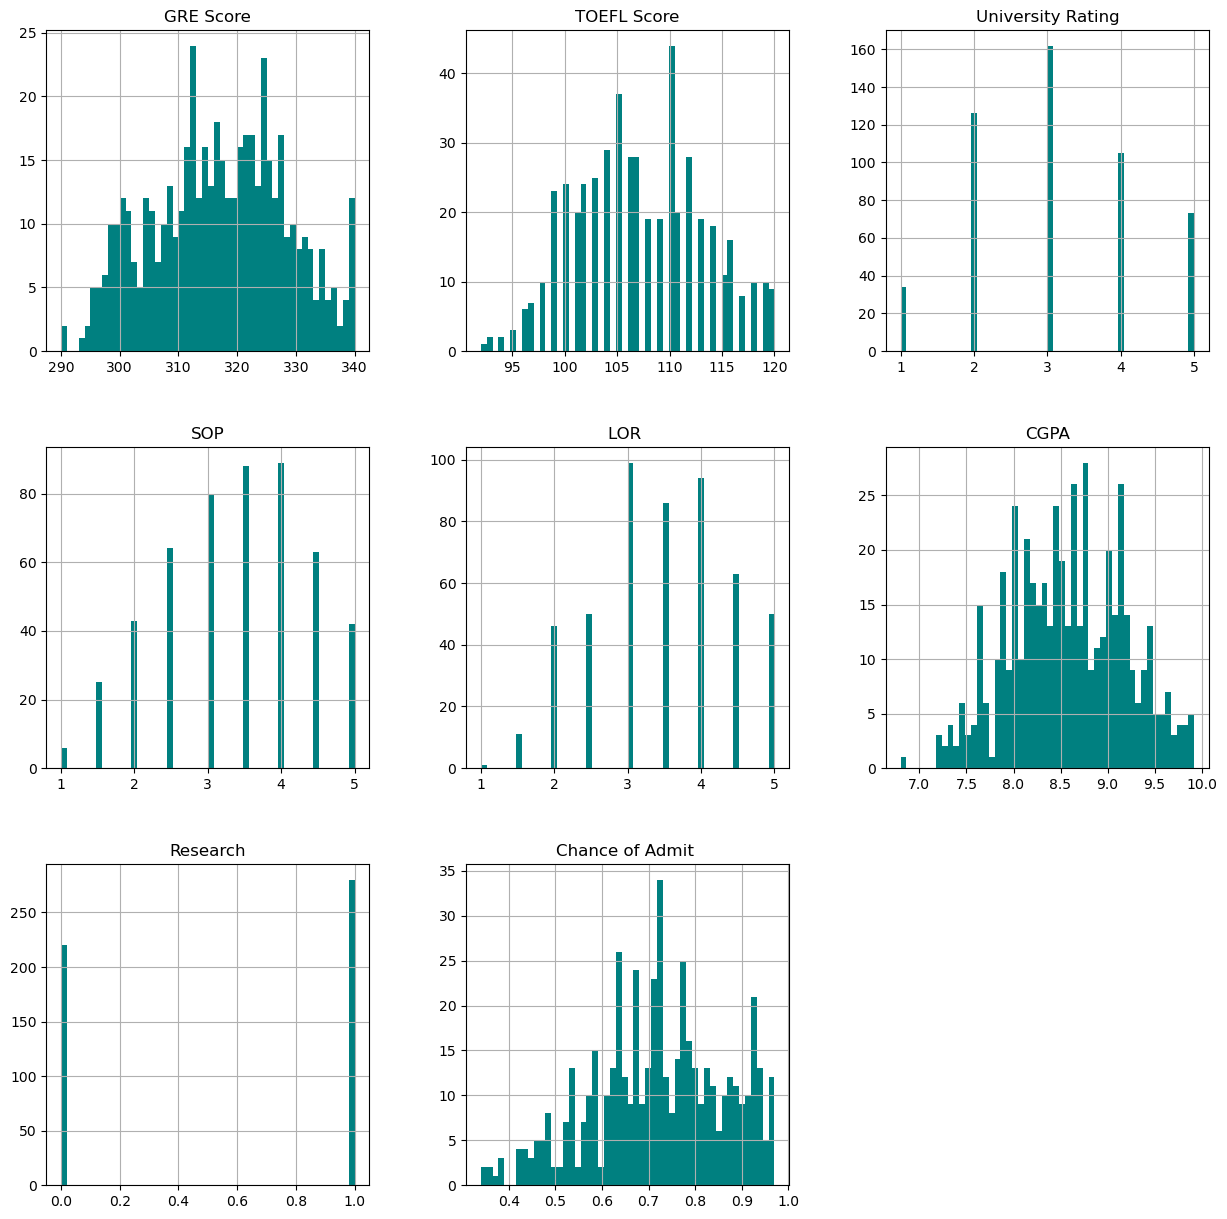

In [12]:
jamb.hist(color='teal',figsize=(15,15),bins=50)
plt.show()

# `EXPLORATORY DATA ANALYSIS`

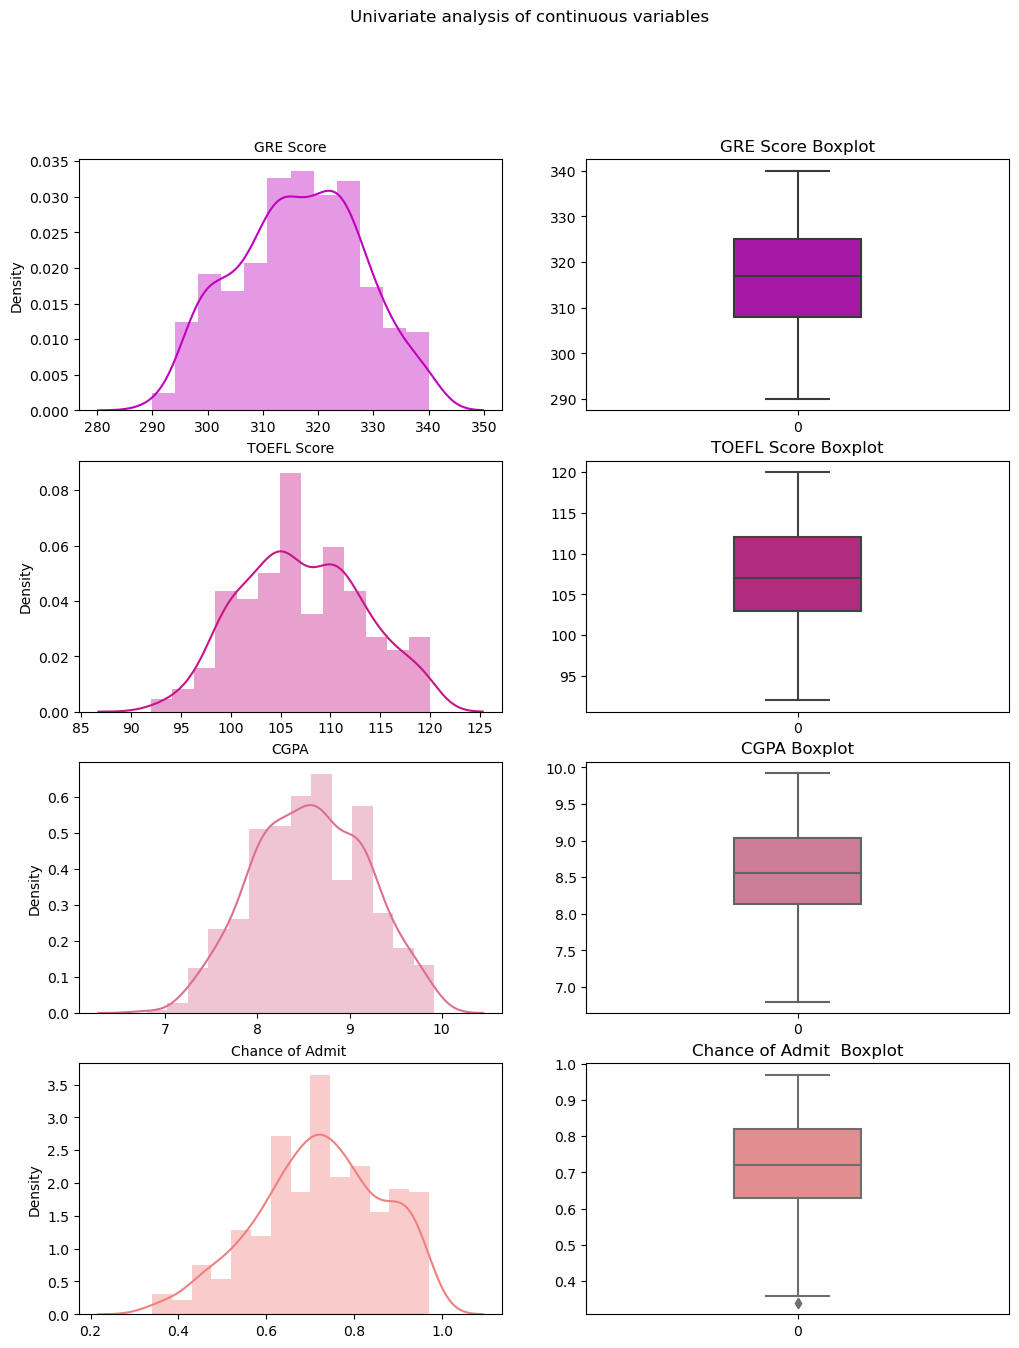

In [13]:
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']
colors = ['m','mediumvioletred','palevioletred','lightcoral']
fig, ax = plt.subplots(len(num_cols),2, figsize=(12,15))
for i in range(len(num_cols)):
    sns.distplot(jamb[num_cols[i]], ax=ax[i,0], color=colors[i])
    ax[i,0].set_title(num_cols[i],fontsize=10)
    ax[i,0].set_xlabel('')
    sns.boxplot(jamb[num_cols[i]], width = 0.3, ax=ax[i,1], color=colors[i])
    ax[i,1].set_title(num_cols[i]+str(" Boxplot"))
    ax[i,1].set_xlabel('')
plt.suptitle("Univariate analysis of continuous variables")
plt.show()

### Observations of the Violin plot:

   * No outliers can be seen in the dataset.
   * TOEFL Score and GRE Score shares the charactersitics of Gaussin Distribution.
   * CGPA depicts a Gaussin Distribution(in kde plot)


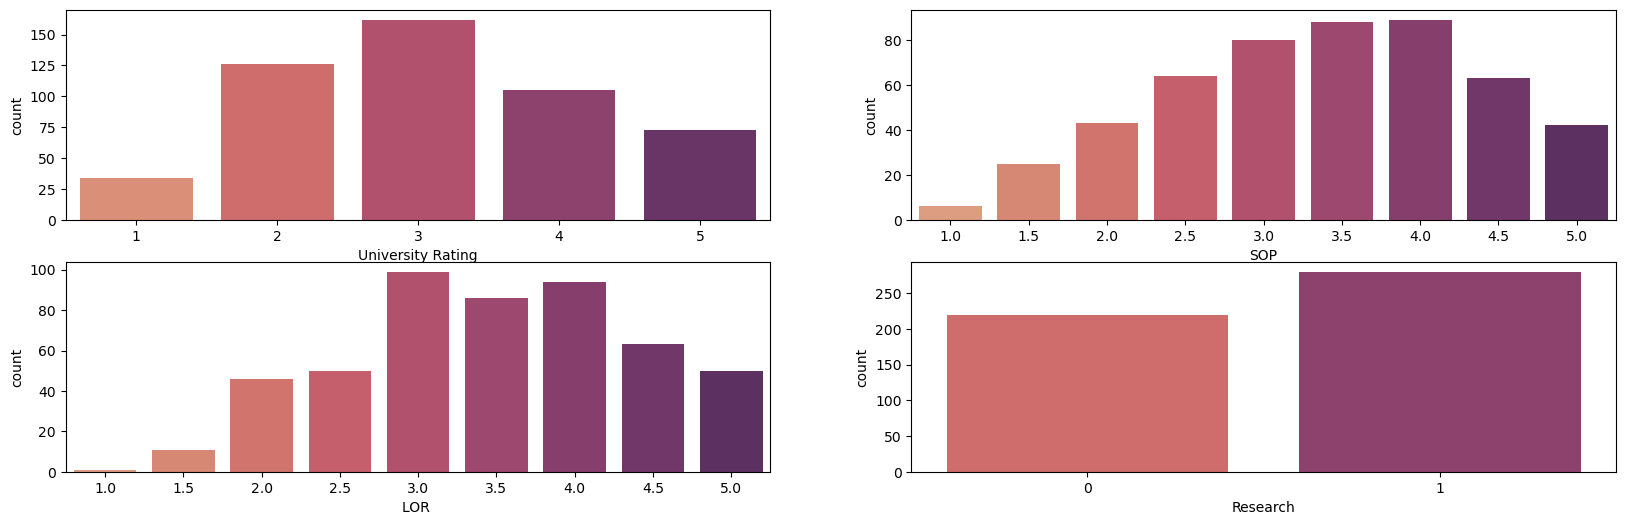

In [14]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(2,2,1)
sns.countplot(x=jamb['University Rating'],palette='flare')

ax = fig.add_subplot(2,2,2)
sns.countplot(x=jamb['SOP'],palette='flare')

ax = fig.add_subplot(2,2,3)
sns.countplot(x=jamb['LOR '],palette='flare')

ax = fig.add_subplot(2,2,4)
sns.countplot(x=jamb['Research'],palette='flare')
plt.show()

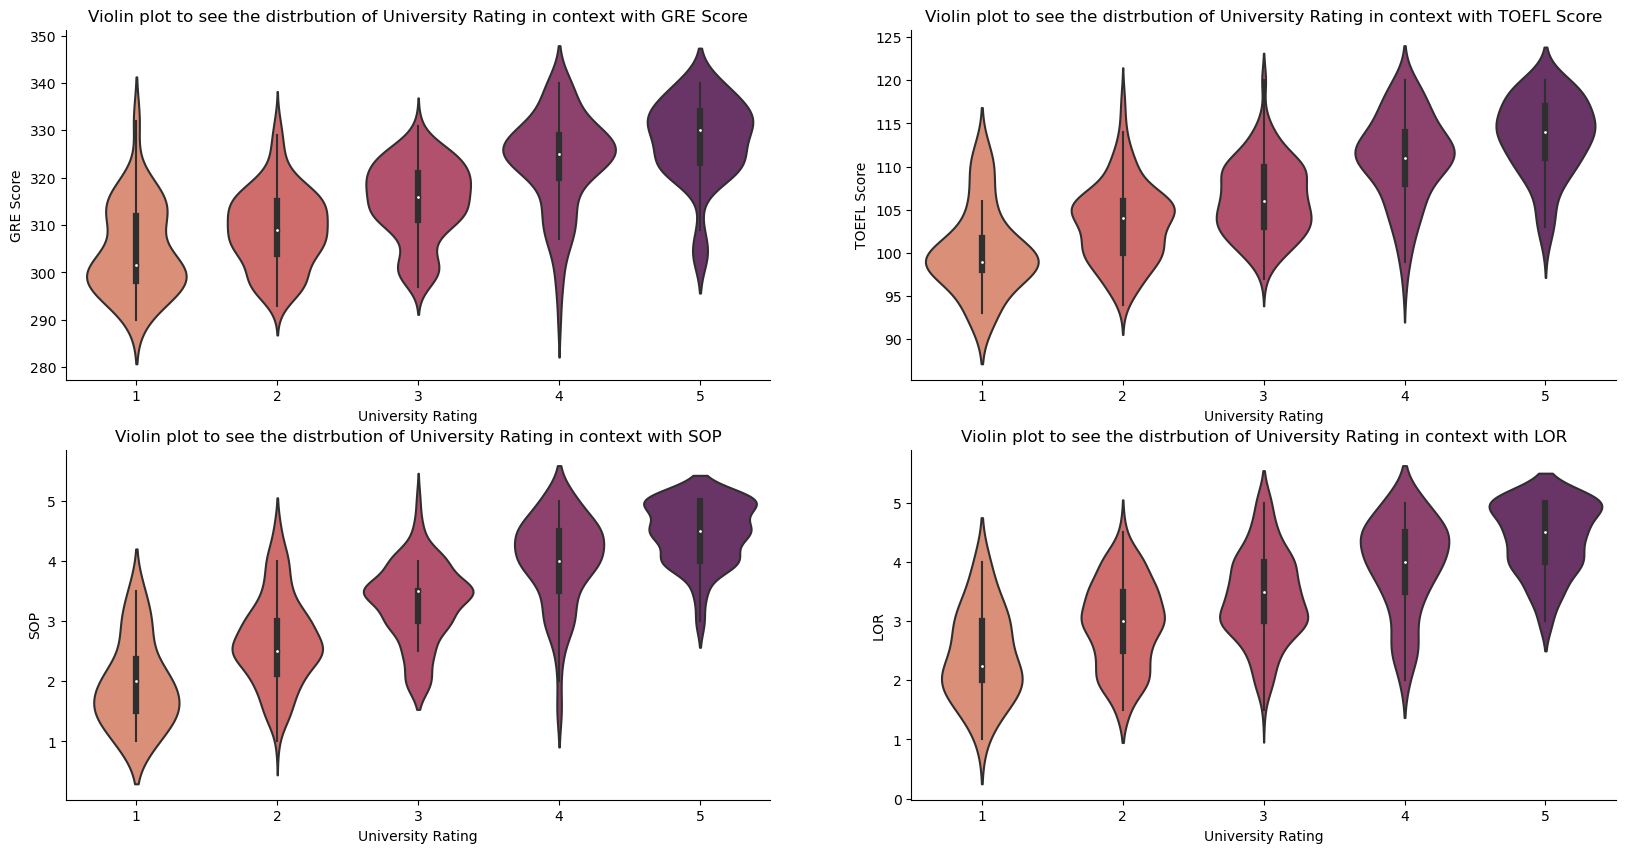

In [15]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2,2,1)
sns.violinplot(x=jamb['University Rating'],y=jamb['GRE Score'],palette='flare')
plt.title('Violin plot to see the distrbution of University Rating in context with GRE Score')

ax = fig.add_subplot(2,2,2)
sns.violinplot(x=jamb['University Rating'],y=jamb['TOEFL Score'],palette='flare')
plt.title('Violin plot to see the distrbution of University Rating in context with TOEFL Score')

ax = fig.add_subplot(2,2,3)
sns.violinplot(x=jamb['University Rating'],y=jamb['SOP'],palette='flare')
plt.title('Violin plot to see the distrbution of University Rating in context with SOP')

ax = fig.add_subplot(2,2,4)
sns.violinplot(x=jamb['University Rating'],y=jamb['LOR '],palette='flare')
plt.title('Violin plot to see the distrbution of University Rating in context with LOR')
sns.despine()
plt.show()

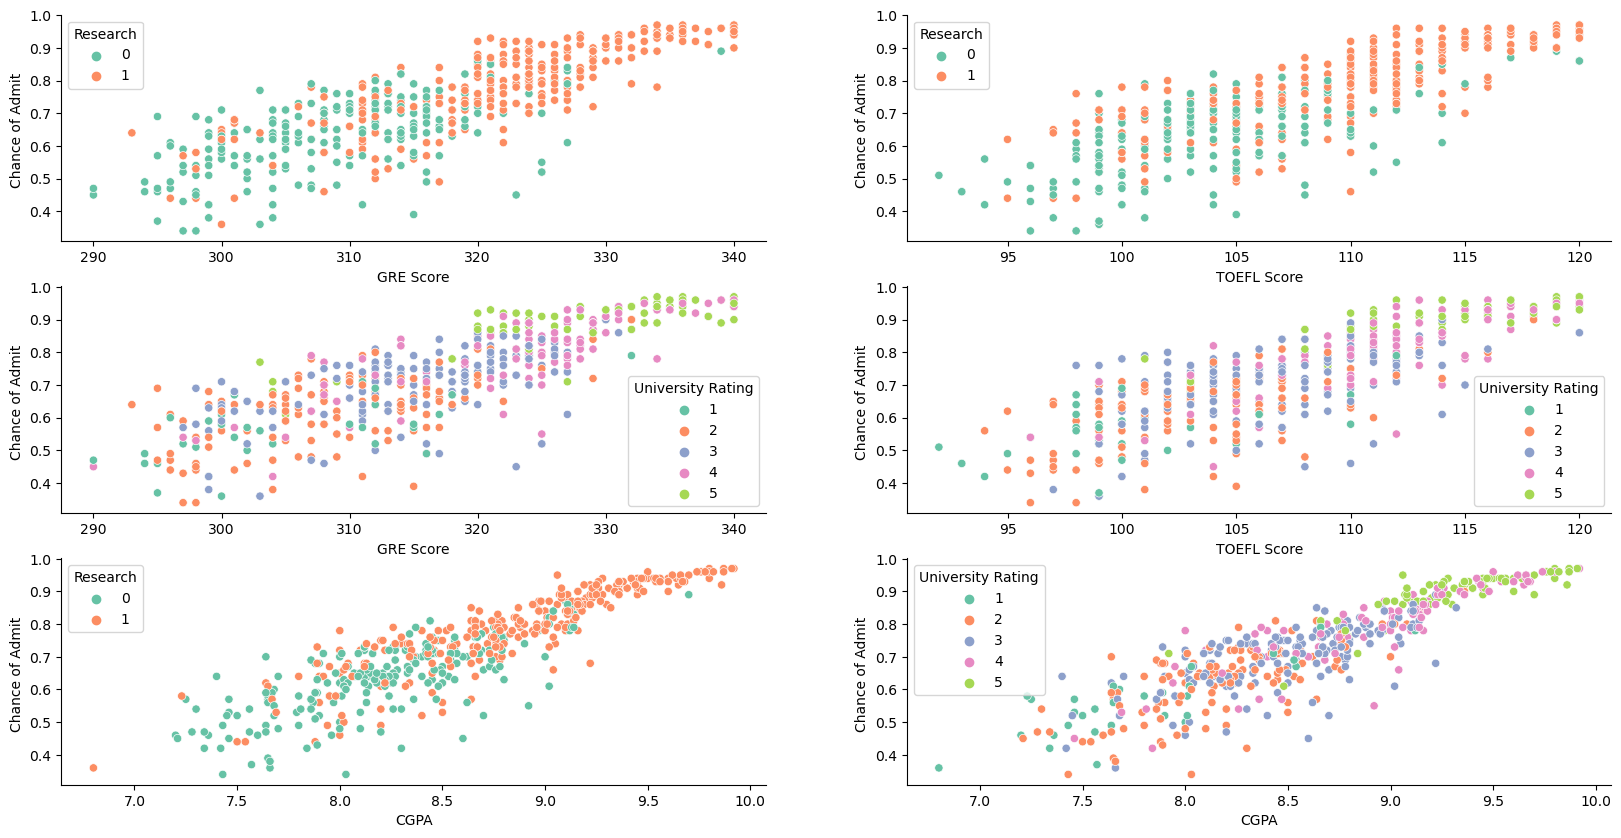

In [16]:
fig, ax = plt.subplots(3,2, figsize=(20,10))
sns.scatterplot(x=jamb['GRE Score'], y=jamb['Chance of Admit '],hue=jamb['Research'], ax=ax[0,0],palette='Set2')
sns.scatterplot(x=jamb['TOEFL Score'], y=jamb['Chance of Admit '],hue=jamb['Research'], ax=ax[0,1],palette='Set2')
sns.scatterplot(x=jamb['GRE Score'], y=jamb['Chance of Admit '], hue=jamb['University Rating'], ax=ax[1,0],palette='Set2')
sns.scatterplot(x=jamb['TOEFL Score'], y=jamb['Chance of Admit '],hue=jamb['University Rating'], ax=ax[1,1],palette='Set2')
sns.scatterplot(x=jamb['CGPA'], y=jamb['Chance of Admit '], hue=jamb['Research'],ax=ax[2,0],palette='Set2')
sns.scatterplot(x=jamb['CGPA'], y=jamb['Chance of Admit '], hue=jamb['University Rating'], ax=ax[2,1],palette='Set2')
sns.despine()
plt.show()

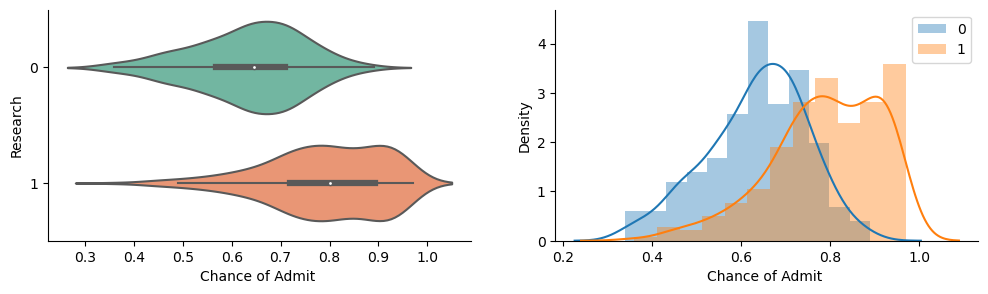

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12,3))
sns.violinplot(y=jamb['Research'], x=jamb['Chance of Admit '], orient='h', ax=ax[0],palette='Set2')
sns.distplot(jamb[jamb['Research']==0]['Chance of Admit '], ax = ax[1], label='0')
sns.distplot(jamb[jamb['Research']==1]['Chance of Admit '], ax = ax[1], label='1')
ax[1].legend()
sns.despine()
plt.show()

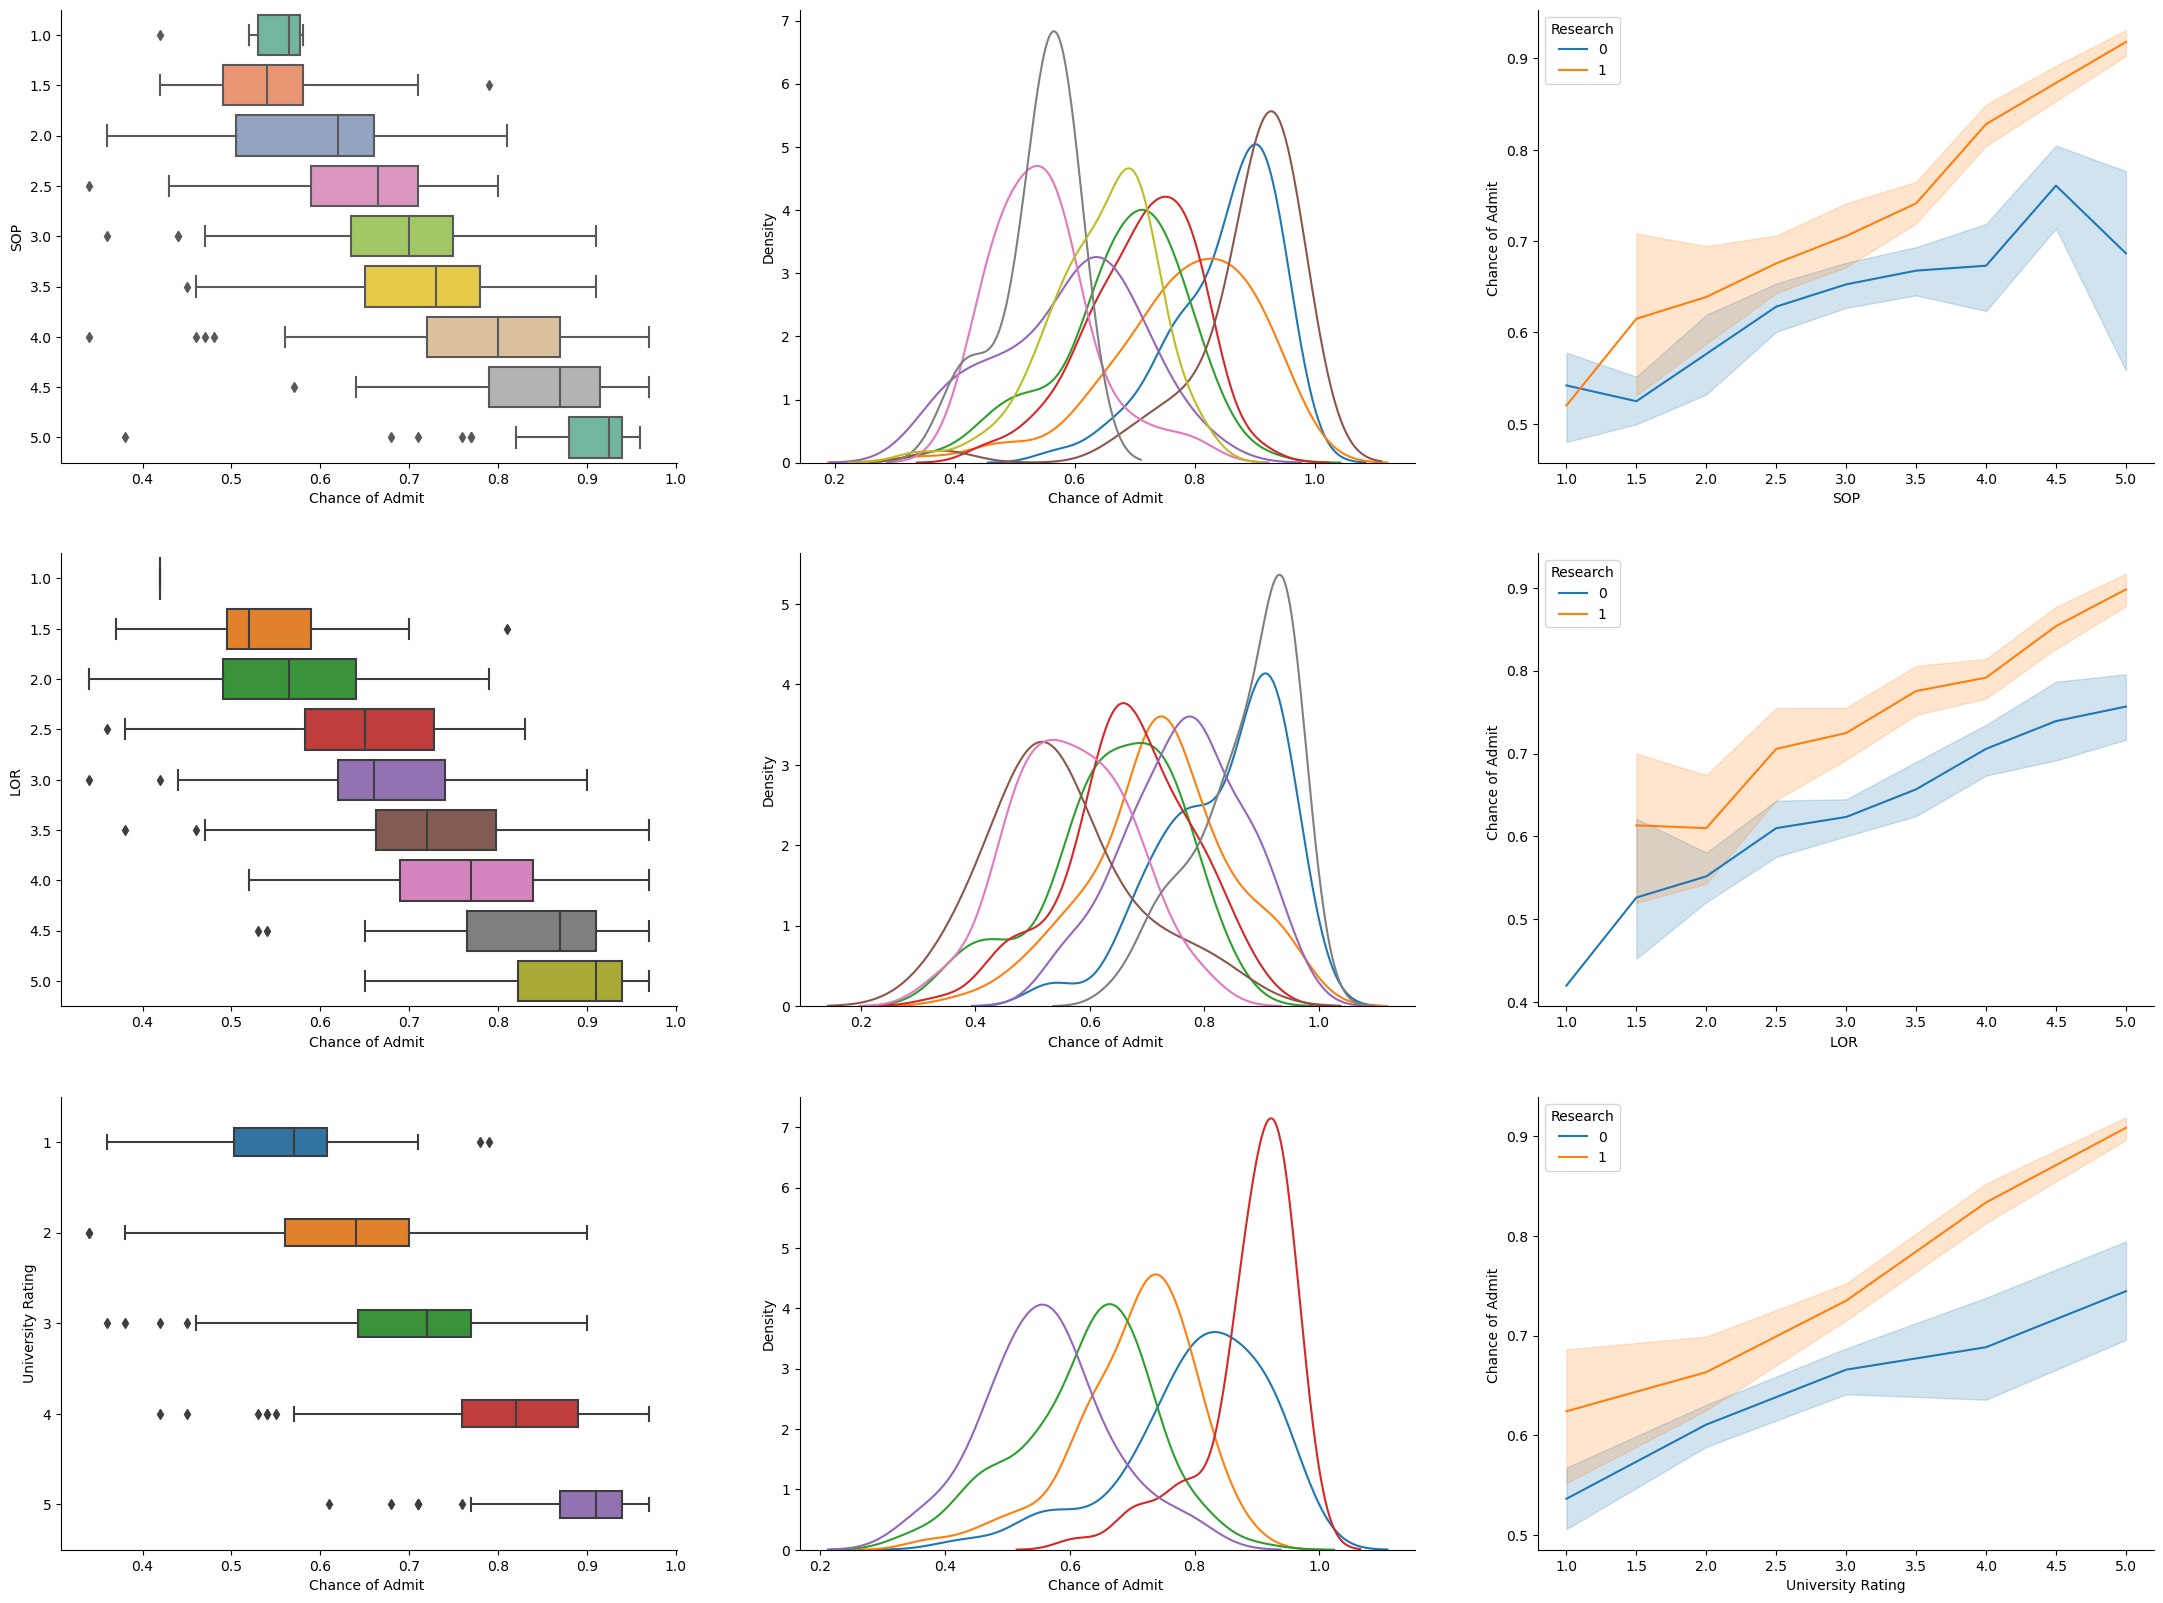

In [18]:
def dist(df, col, hue, i, j):
    range_values = jamb[hue].unique()
    for val in range_values:
        sns.distplot(jamb[jamb[hue]==val][col], hist=False, ax = ax[i,j])
fig, ax = plt.subplots(3,3, figsize=(27,20))
sns.boxplot(y=jamb['SOP'], x=jamb['Chance of Admit '], orient='h', ax=ax[0,0],palette='Set2')
dist(jamb, 'Chance of Admit ', 'SOP', 0, 1)
sns.lineplot(x=jamb['SOP'],y=jamb['Chance of Admit '],ax=ax[0,2],hue=jamb['Research'])
sns.boxplot(y=jamb['LOR '], x=jamb['Chance of Admit '], orient='h', ax=ax[1,0])
dist(jamb, 'Chance of Admit ', 'LOR ', 1, 1)
sns.lineplot(x=jamb['LOR '],y=jamb['Chance of Admit '],ax=ax[1,2],hue=jamb['Research'])
sns.boxplot(y=jamb['University Rating'], x=jamb['Chance of Admit '], orient='h',width=0.3, ax=ax[2,0])
dist(jamb, 'Chance of Admit ', 'University Rating', 2, 1)
sns.lineplot(x=jamb['University Rating'],y=jamb['Chance of Admit '],ax=ax[2,2],hue=jamb['Research'])
sns.despine()
plt.show()

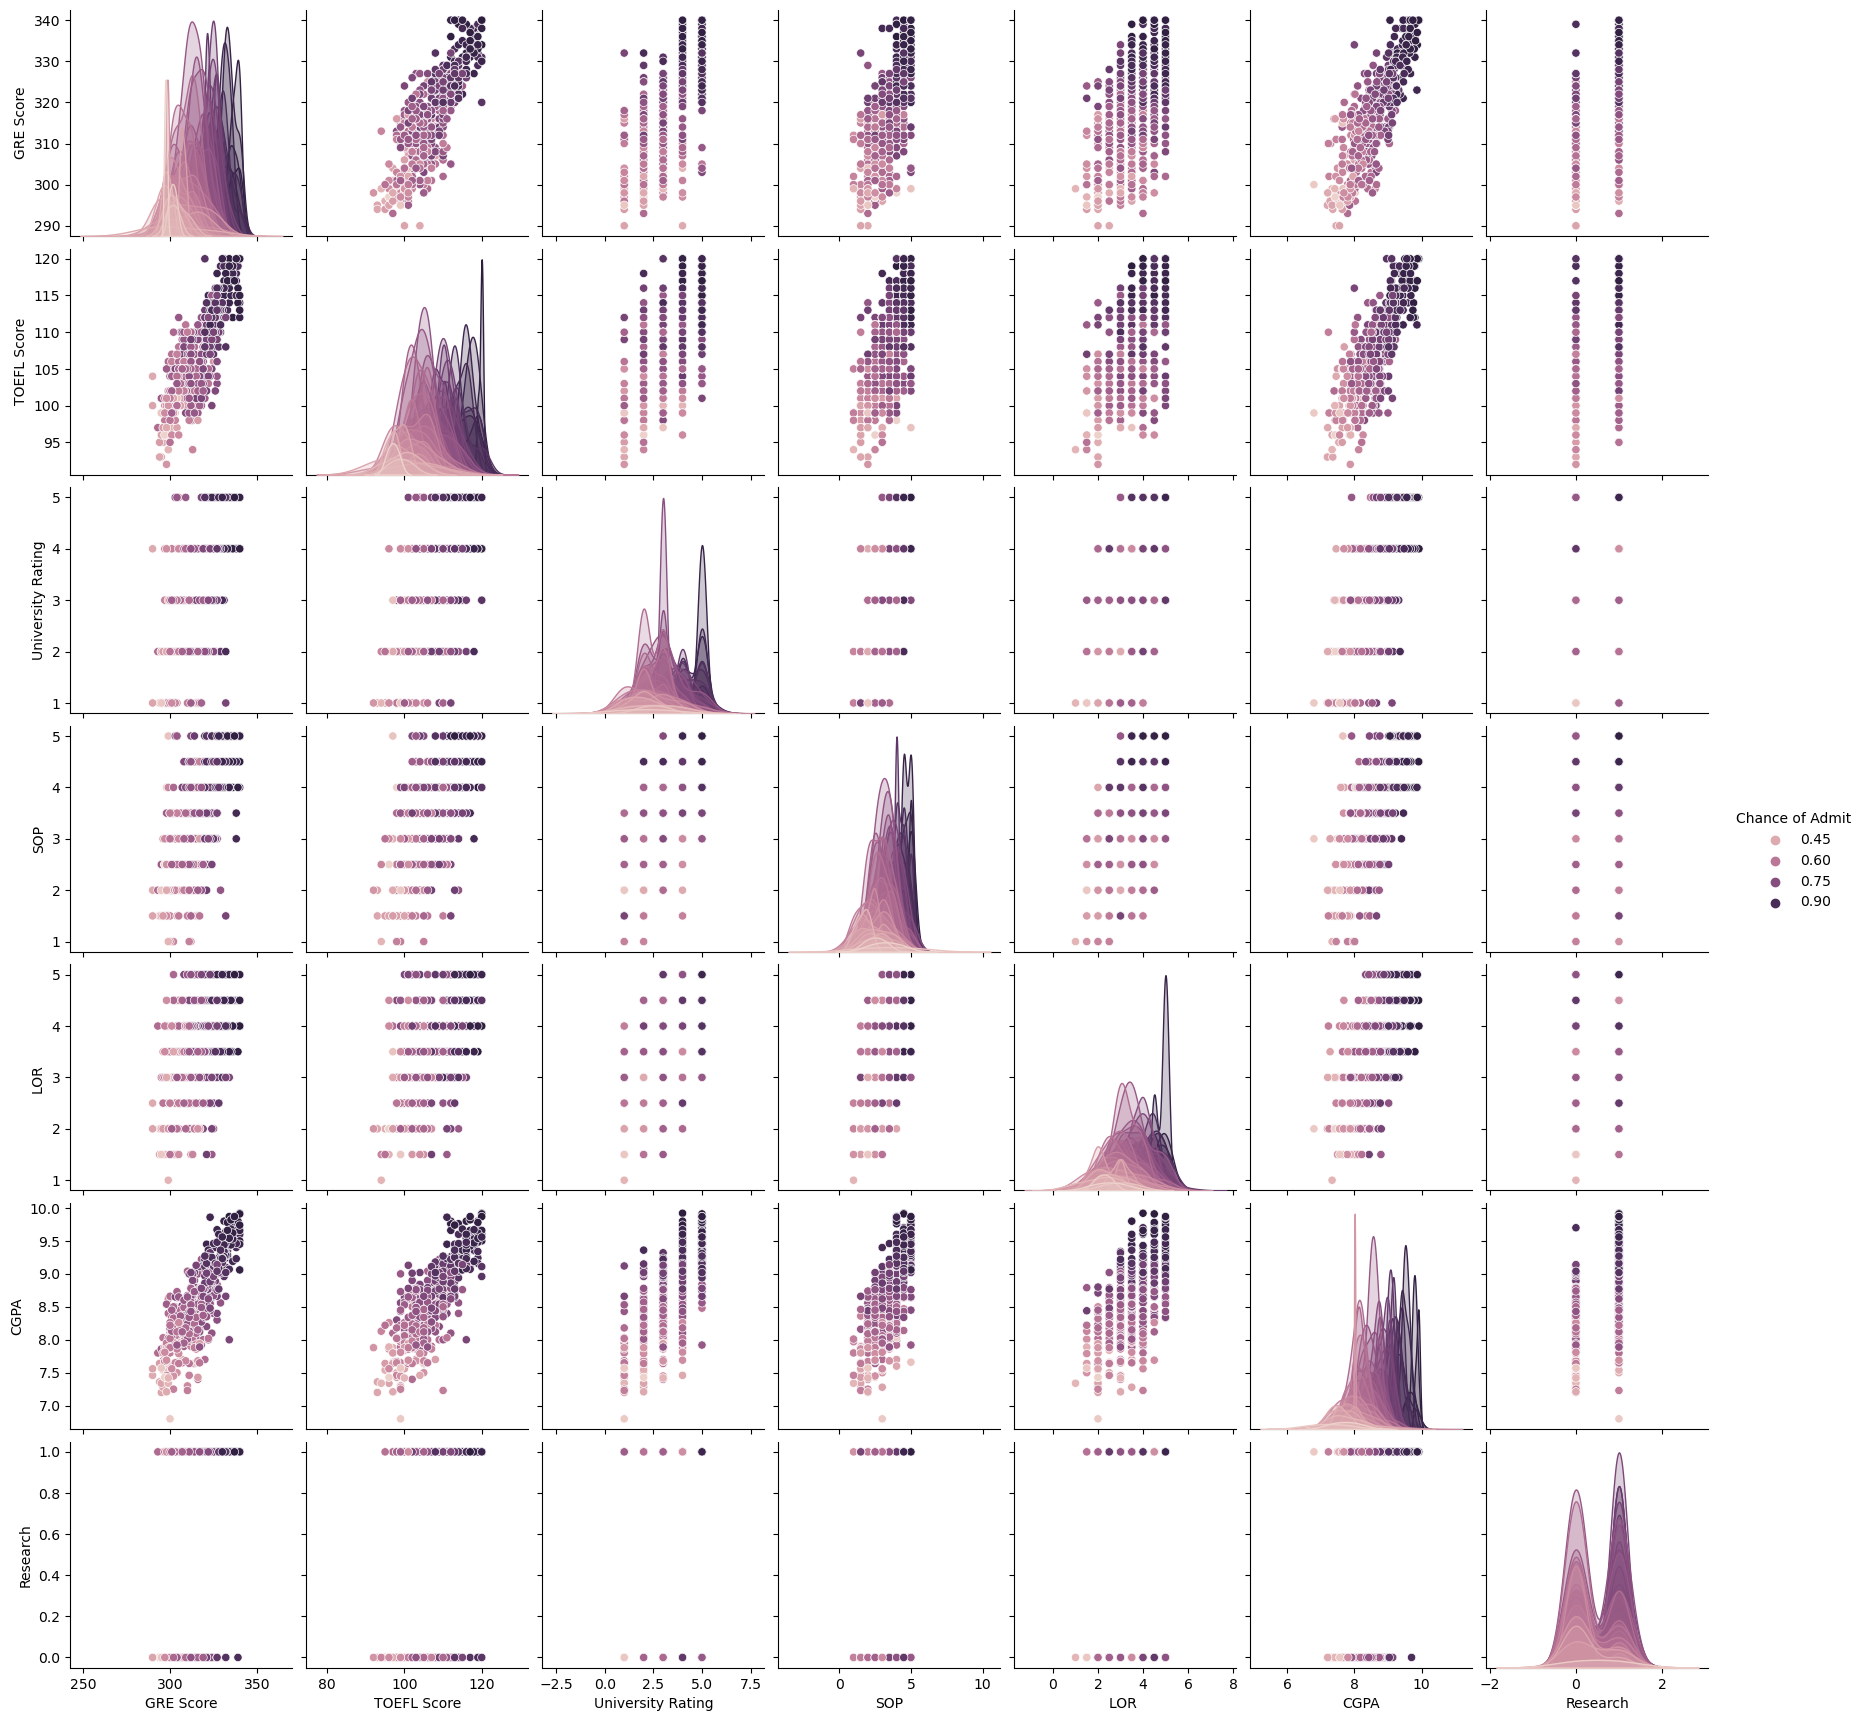

In [19]:
sns.pairplot(data=jamb,hue='Chance of Admit ')
plt.show()

### `Observation:-`

   * As University Ratings increases, GRE scores and TOEFL score increses.
   * The student who received maximum scores in GRE scores and TOEFL scores got University Rating as 4 and 5.
   * University Rating '4' given to both GRE and TOEFL scorers follows notibly same distribution.
   * Maximum marks scored by GRE students received University Rating as '4' and '5'.
   * Maximum number of students doing research received a University Rating of 3.
   * Non-Research increases till University Rating 3 and then declines.
   * LOR increases with SOP.

# ```````````````````````````````````````` Data Transformation ````````````````````````````````````````

In [20]:
jamb.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [21]:

# renaming the columns
jamb.rename(columns={'GRE Score':'GRE_score','TOEFL Score':'TOEFL_score',
            'University Rating':'University_rating','LOR ':'LOR',
            'Chance of Admit ':'Chance_of_admit'},inplace=True)

# `````````````LINEAR REGRESSION`````````````

In [22]:
jamb.head()

,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Research,Chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Linear regression - {y = (w1x1) + (w2x2) .......... (wnxn) + w0
#### x represents the dependent variables or target variables.
#### y represents the independent variable or predicted variable


In [24]:
x = jamb.drop(columns='Chance_of_admit')
y = jamb['Chance_of_admit']

In [25]:
x_train,x_test,y_train,y_test= train_test_split(
                                            x,y,
                                            test_size=0.2,random_state=42
                                           )

In [26]:
# applyting StandartScaler on x 
scale = StandardScaler()
scale.fit(x)
x = scale.transform(x)

In [27]:
# calling the linear regression function
li_reg = LinearRegression()
li_reg.fit(x_train,y_train)

LinearRegression()

In [28]:
print(f'The coefficient for linear regression: {li_reg.coef_}')
print()
print(f'The intercept for linear regression: {li_reg.intercept_}')

The coefficient for linear regression: [0.00243444 0.00299587 0.0025688  0.00181369 0.01723798 0.11252708
 0.02402679]

The intercept for linear regression: -1.4214470719016474


###  Checking  MAE,  Score,  RSME,  R^2   and  Adjusted R^2 for Linear Regression

In [29]:
y_predict = li_reg.predict(x_test)

In [30]:
print('The score of Linear Regression for Training Data:',li_reg.score(x_train,y_train))
print('-'*100)
print('The score of Linear Regression for Test Data:',li_reg.score(x_test,y_test))
print('-'*100)
print('Mean Absolute error:',mean_absolute_error(y_true=y_test,y_pred=y_predict)) 
print('-'*100)
print('Root Mean Squared Error:',mean_squared_error(y_true=y_test,y_pred=y_predict,squared=False))
print('-'*100)
print('R^2:',r2_score(y_test,y_predict))
print('-'*100)
print('Adjusted R^2: ',(1 - (1-(r2_score(y_test,y_predict)))*(len(y)-1)/(len(y)-x.shape[1]-1)))
print('-'*100)

The score of Linear Regression for Training Data: 0.8210671369321554
----------------------------------------------------------------------------------------------------
The score of Linear Regression for Test Data: 0.8188432567829629
----------------------------------------------------------------------------------------------------
Mean Absolute error: 0.042722654277053664
----------------------------------------------------------------------------------------------------
Root Mean Squared Error: 0.06086588041578311
----------------------------------------------------------------------------------------------------
R^2: 0.8188432567829629
----------------------------------------------------------------------------------------------------
Adjusted R^2:  0.816265823444509
----------------------------------------------------------------------------------------------------


### Observations:

   * CGPA claims the highest Weightage in coeffieints among all variable during Linear Regression.

#  A. `REGULARIZATION(L2) - RIDGE REGRESSION`

### Ridge regression performs ‘L2 regularization‘, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:
____________________________________________________________________________________
## Objective = RSS + α * (sum of square of coefficients)
____________________________________________________________________________________
### Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients.



In [31]:
reg = Ridge(alpha=0)
reg.fit(x_train,y_train)
reg.coef_

array([0.00243444, 0.00299587, 0.0025688 , 0.00181369, 0.01723798,
       0.11252708, 0.02402679])

if α = 0:
* The objective becomes same as simple linear regression.
* Coefficeints will be the same coefficients as simple linear regression
------------------------------------------------------------------------
________________________________________________________________________

In [32]:
reg = Ridge(alpha=1)
reg.fit(x_train,y_train)
reg.coef_

array([0.00252146, 0.0030726 , 0.00276683, 0.00216403, 0.01747795,
       0.10907905, 0.02367853])

In [33]:
reg = Ridge(alpha=2)
reg.fit(x_train,y_train)
reg.coef_

array([0.00260353, 0.00314479, 0.00295385, 0.00249203, 0.01769704,
       0.1058438 , 0.02334041])

____________________________________________________________________________________
------------------------------------------------------------------------------------
if 0 < α < ∞:
* The magnitude of α will decide the weightage given to different parts of objective.
* The coefficients will be somewhere between 0 and ones for simple linear regression.

  Will work with aplha = 3
____________________________________________________________________________________
------------------------------------------------------------------------------------

In [34]:
reg = Ridge(alpha=3)
reg.fit(x_train,y_train)

Ridge(alpha=3)

In [35]:
print('Coefficients:',reg.coef_)
print()
print('Intercept:',reg.intercept_)

Coefficients: [0.00268107 0.00321285 0.00313079 0.00279969 0.01789725 0.10280217
 0.02301201]

Intercept: -1.4462140274249835


In [36]:
reg_pred = reg.predict(x_test)

###  Checking  MAE,  Score,  RSME,  R^2   and  Adjusted R^2 for Ridge Regression

In [37]:
print('The score of Ridge Regression for Training Data:',reg.score(x_train,y_train),'.')
print('-'*100)
print('The score of Ridge Regression for Test Data:',reg.score(x_test,y_test),'.')
print('-'*100)
print('Mean Absolute error:',mean_absolute_error(y_true=y_test,y_pred=reg_pred),'.')       # defailt squared =True
print('-'*100)
print('Root Mean Squared Error:',mean_squared_error(y_true=y_test,y_pred=reg_pred,squared=False),'.')
print('-'*100)
print('R^2:',r2_score(y_test,reg_pred),'.')
print('-'*100)
print('Adjusted R^2: ',(1 - (1-(r2_score(y_test,reg_pred)))*(len(y)-1)/(len(y)-x.shape[1]-1)),'.')
print('-'*100)

The score of Ridge Regression for Training Data: 0.8206845351279538 .
----------------------------------------------------------------------------------------------------
The score of Ridge Regression for Test Data: 0.8161651589964274 .
----------------------------------------------------------------------------------------------------
Mean Absolute error: 0.043161377970055544 .
----------------------------------------------------------------------------------------------------
Root Mean Squared Error: 0.06131412968087423 .
----------------------------------------------------------------------------------------------------
R^2: 0.8161651589964274 .
----------------------------------------------------------------------------------------------------
Adjusted R^2:  0.8135496226406855 .
----------------------------------------------------------------------------------------------------


{'0': 'GRE score', '1': 'TOEFL score', '2': 'University Rating', '3': 'SOP', '4': 'LOR', '5': 'CGPA', '6': 'Research'}


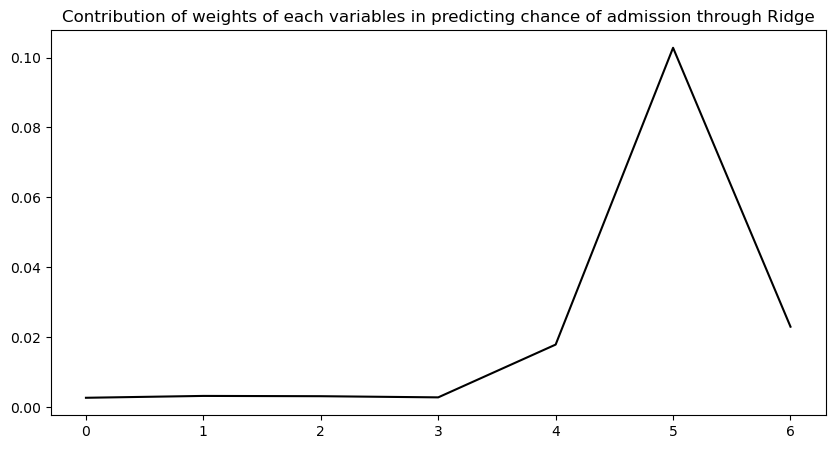

In [38]:
plt.figure(figsize=(10,5))
plt.plot(reg.coef_, color='black')
plt.title('Contribution of weights of each variables in predicting chance of admission through Ridge')
print({'0':'GRE score','1':'TOEFL score','2':'University Rating','3':'SOP','4':'LOR','5':'CGPA','6':'Research'})
plt.show()

### Observations:

   * CGPA holds the highest Weightage in coeffieints among all variable during Ridge Regularization.

# B. `REGULARIZATION(L1) - LASSO REGRESSION`

### LASSO stands for Least Absolute Shrinkage and Selection Operator. I know it doesn’t give much of an idea but there are 2 key words here – ‘absolute‘ and ‘selection‘.

### Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:

____________________________________________________________________________________
## Objective = RSS + α * (sum of absolute value of coefficients)
____________________________________________________________________________________

### Here, α (alpha) works similar to that of ridge and provides a trade-off between balancing RSS and magnitude of coefficients.

________________________________________________________________________
------------------------------------------------------------------------
if α = 0:

* Coefficeints will be the same coefficients as simple linear regression

if α = ∞: 

* All coefficients zero (same logic as before)

0 < α < ∞: 

* Coefficients between 0 and that of simple linear regression
________________________________________________________________________
------------------------------------------------------------------------

In [39]:
laso = Lasso(alpha=0.000001)
laso.fit(x_train,y_train)

Lasso(alpha=1e-06)

In [40]:
print('Coefficients:',laso.coef_)
print()
print('Intercept:',laso.intercept_)

Coefficients: [0.00243487 0.00299614 0.00256902 0.00181369 0.01723792 0.11251769
 0.02402109]

Intercept: -1.4215302107399883


In [41]:
laso_pred = laso.predict(x_test)

### Checking MAE, Score, RSME, R^2 and Adjusted R^2 for Lasso Regression


In [42]:
print('The score of Lasso Regression for Training Data:',laso.score(x_train,y_train),'.')
print()
print('The score of Lasso Regression for Test Data:',laso.score(x_test,y_test),'.')
print()
print('Mean Absolute error:',mean_absolute_error(y_true=y_test,y_pred=laso_pred),'.')       # defailt squared =True
print()
print('Root Mean Squared Error:',mean_squared_error(y_true=y_test,y_pred=laso_pred,squared=False),'.')
print()
print('R^2:',r2_score(y_test,laso_pred),'.')
print()
print('Adjusted R^2: ',(1 - (1-(r2_score(y_test,laso_pred)))*(len(y)-1)/(len(y)-x.shape[1]-1)),'.')
print()

The score of Lasso Regression for Training Data: 0.8210671361989015 .

The score of Lasso Regression for Test Data: 0.8188389555619385 .

Mean Absolute error: 0.04272308291328992 .

Root Mean Squared Error: 0.06086660298356036 .

R^2: 0.8188389555619385 .

Adjusted R^2:  0.8162614610272507 .



{'0': 'GRE score', '1': 'TOEFL score', '2': 'University Rating', '3': 'SOP', '4': 'LOR', '5': 'CGPA', '6': 'Research'}


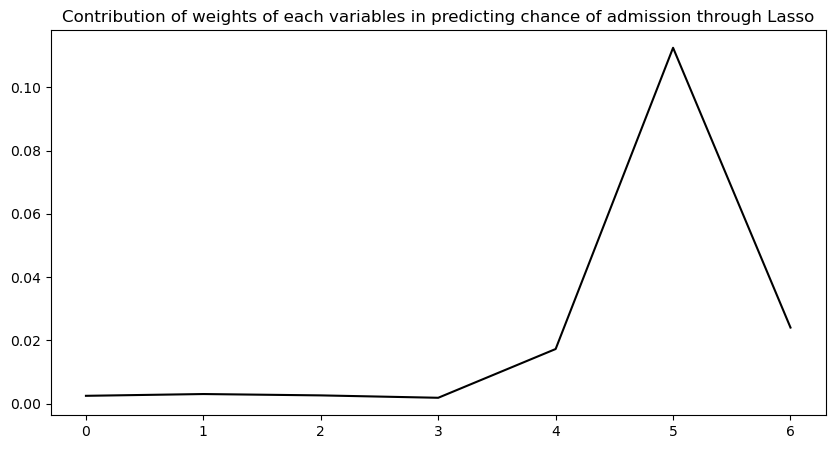

In [43]:
x_ticks = list(x)
y_ticks = list(laso.coef_)
plt.figure(figsize=(10,5))
plt.plot(laso.coef_, color='black')
plt.title('Contribution of weights of each variables in predicting chance of admission through Lasso')
print({'0':'GRE score','1':'TOEFL score','2':'University Rating','3':'SOP','4':'LOR','5':'CGPA','6':'Research'})
plt.show()

### Observations:

   * CGPA claims the highest Weightage in coeffieints among all variable during Lasso Regression.

# C. `ELASTIC NET `

### Elastic Net is a middle ground between Ridge Regression and Lasso Regression. 

### The regularization term is a simple mix of both Ridge and Lasso’s regularization terms,and you can control the mix ratio r. 

### When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression.

In [44]:
n = (0.00001,0.0001,0.001,0.01)
for i in range(len(n)):
    net = ElasticNet(alpha=i)
    net.fit(x_train,y_train)
    print('Coefficients:',net.coef_)
    print('Intercept:', net.intercept_)

Coefficients: [0.00243444 0.00299587 0.0025688  0.00181369 0.01723798 0.11252708
 0.02402679]
Intercept: -1.4214470719016465
Coefficients: [0.00632212 0.         0.         0.         0.         0.
 0.        ]
Intercept: -1.2782149921392243
Coefficients: [0.00216457 0.         0.         0.         0.         0.
 0.        ]
Intercept: 0.03859771307360926
Coefficients: [0. 0. 0. 0. 0. 0. 0.]
Intercept: 0.7241749999999999


### Taking alpha as 0.00001

In [45]:
net = ElasticNet(alpha=0.00001)
net.fit(x_train,y_train)
print('Coefficients:',net.coef_)
print('Intercept:', net.intercept_)

Coefficients: [0.00243674 0.0029974  0.00257008 0.00181432 0.01723826 0.11247386
 0.02399792]
Intercept: -1.4218727949687802


In [46]:
net_pred = net.predict(x_test)

### Checking MAE, Score, RSME, R^2 and Adjusted R^2 for Lasso Regression


In [47]:
print('The score of Lasso Regression for Training Data:',net.score(x_train,y_train),'.')
print()
print('The score of Lasso Regression for Test Data:',net.score(x_test,y_test),'.')
print()
print('Mean Absolute error:',mean_absolute_error(y_true=y_test,y_pred=net_pred),'.')       # defailt squared =True
print()
print('Root Mean Squared Error:',mean_squared_error(y_true=y_test,y_pred=net_pred,squared=False),'.')
print()
print('R^2:',r2_score(y_test,net_pred),'.')
print()
print('Adjusted R^2: ',(1 - (1-(r2_score(y_test,net_pred)))*(len(y)-1)/(len(y)-x.shape[1]-1)),'.')
print()

The score of Lasso Regression for Training Data: 0.8210671158795124 .

The score of Lasso Regression for Test Data: 0.8188203217624068 .

Mean Absolute error: 0.04272506585304818 .

Root Mean Squared Error: 0.060869733200982414 .

R^2: 0.8188203217624068 .

Adjusted R^2:  0.816242562112685 .



# `LINEAR REGRESSION ASSUMPTIONS TESTING`

______________________________________________________________________________________
--------------------------------------------------------------------------------------
##### a) Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5) 
##### b) The mean of residuals is nearly zero
##### c) Linearity of variables (no pattern in the residual plot) 
##### d) Test for Homoscedasticity 
##### e) Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line) 
______________________________________________________________________________________
--------------------------------------------------------------------------------------



### a) Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5) 


In [48]:
x

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [49]:
col = jamb[['GRE_score', 'TOEFL_score', 'University_rating', 'SOP', 'LOR', 'CGPA','Research']]
x1 = np.array(x_train)
vif = []
for i in range(x1.shape[1]):
    vif.append(round(variance_inflation_factor(x1, i),2))
vif_score= pd.DataFrame({'Columns':['GRE_score', 'TOEFL_score', 'University_rating', 'SOP', 'LOR', 'CGPA','Research'],
                       'VIF score':vif})
    

##### Observation:-

    It can be observed that every column has a VIF less than 5.
    
##### Hense, there is no multicollinearity among the independent variables.

### b) The mean of residuals is nearly zero

In [50]:
normal = y_test - y_predict
print('Mean of Residuals:',(sum(np.array(normal)/len(normal))))

Mean of Residuals: -0.005453623717661267


### c) Linearity of variables (no pattern in the residual plot) 

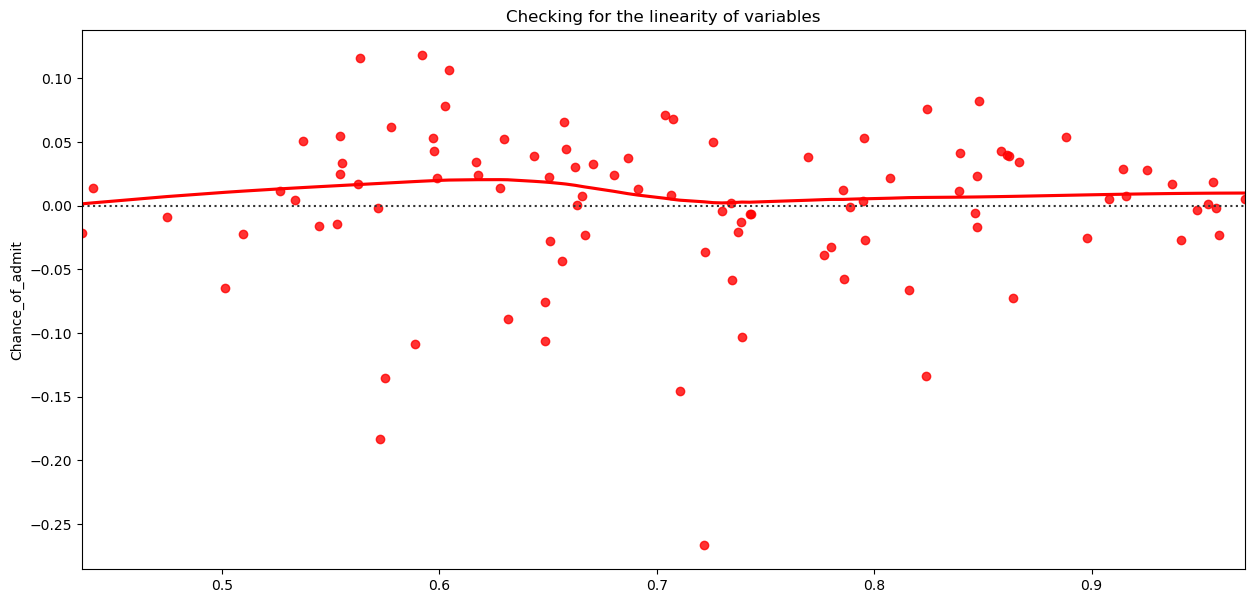

In [51]:
plt.figure(figsize=(15,7))
sns.residplot(x=y_predict,y=normal,lowess=True,color='red')
plt.title('Checking for the linearity of variables')
plt.show() 

### No linearity of Variable can be observed.

### d) Test for Homoscedasticity 

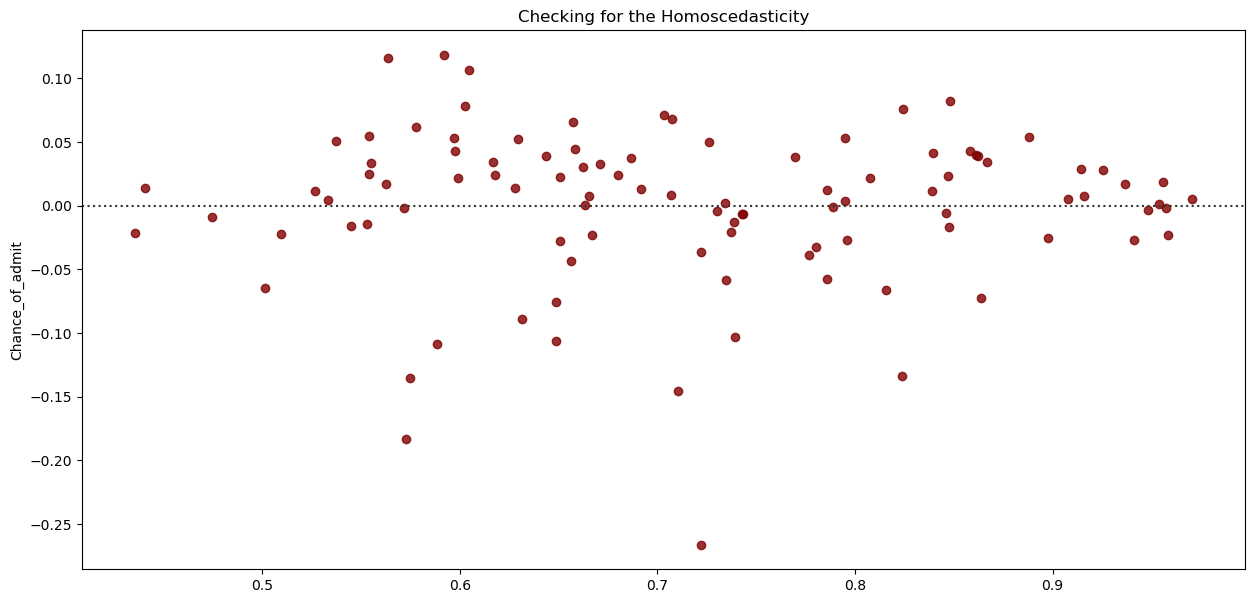

In [52]:
plt.figure(figsize=(15,7))
sns.residplot(x=y_predict,y=normal,color='maroon')
plt.title('Checking for the Homoscedasticity')
plt.show() 

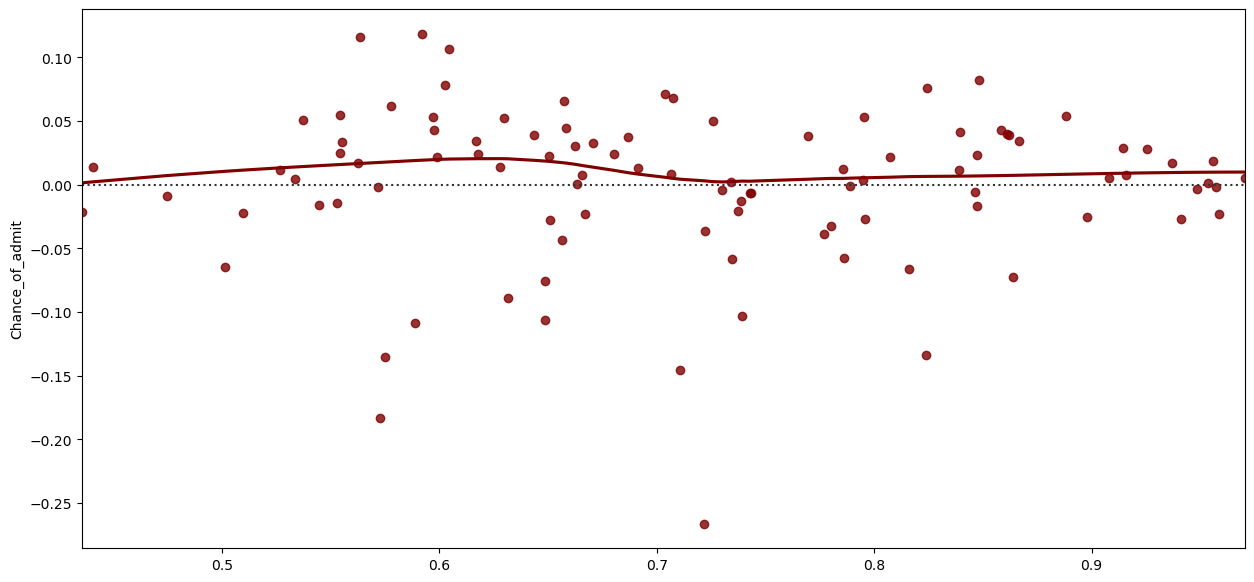

In [53]:
plt.figure(figsize=(15,7))
sns.residplot(x=y_predict,y=normal,lowess=True,color='maroon')
plt.show() 

### e) Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line) 

In [54]:
normal = y_test - y_predict
normal.head()

361    0.015425
73     0.044819
374   -0.182660
155    0.062630
104   -0.075883
Name: Chance_of_admit, dtype: float64

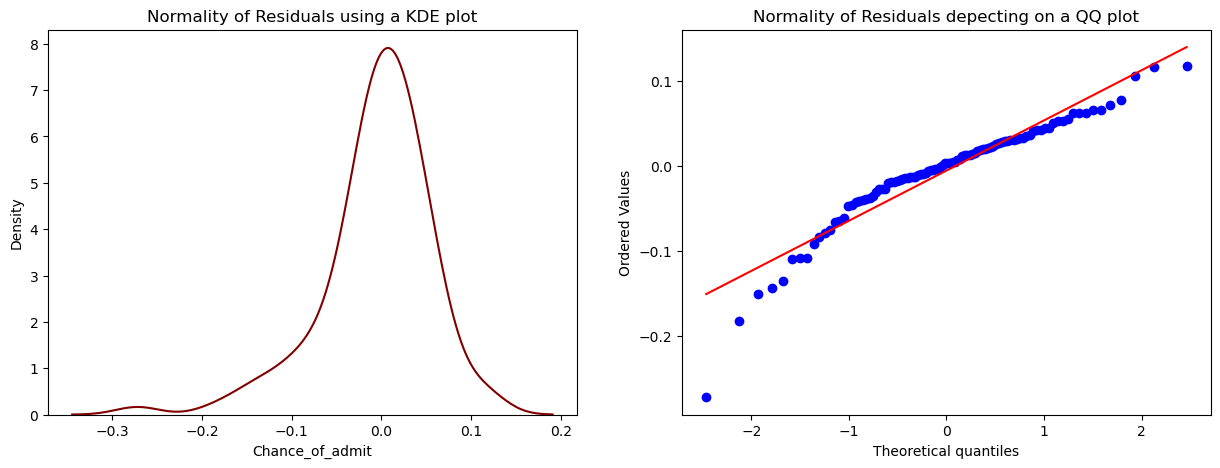

In [55]:
# qq-plot and kde plot of residuals
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
sns.kdeplot(x=normal,color='maroon')
plt.title('Normality of Residuals using a KDE plot')

ax = fig.add_subplot(1,2,2)
sp.stats.probplot(normal,plot=plt)
plt.title('Normality of Residuals depecting on a QQ plot')
plt.show()

# `BUSINESS INSIGHTS & RECOMMENDATIONS:-`


• Most GRE Scores lie between 310-325

• Most TOEFL Scores lie between 103-112

• Most CGPA lie between 8.2-9.0

• Most candidates end up getting prediction ranging from 60% to about 80%.

1. We can try to suggest preparation and score improvement courses for TOEFL and GRE tailored to the candiates existing scores.
2. For those candidates that have low CGPA, they can be advised to focus on and strengthen other aspects of their application.

• Most data points are related to mid-tier universities (3), and not ambitious or safe option
universities.

• The self scored SOP Ratings tend to me mostly 3.5 or 4.

• The self scored LOR Ratings similarly are mostly 3, 3.5 or 4.

• More candidates have research experience than not.

3. Candidates can be recommended more universities to add to their list for predicting chances at, since they seem to be preferring mid-tier universities more. Based on their stats, candidates can be suggested to add more options from both ambitious and safe categories.
4. The self scoring of SOP and LOR might be problematic, since it is highly subjective. Instead of providing just a single score, those can be divided into sub-metrics or scoring rubrics, so that candidates can better evaluate their own SOP and LORs. For example, questions like “Does your SOP address your motivation ?”, “Does your SOP explain your weak points and your reason for choosing the program?”, “Does your SOP identify potential advisors and/or research topics?”, “Does your LOR discuss your work ethic?”, “Are your recommenders academics or professionals?”.
5. Similarly instead of making just a single Yes or No anwer to research experience, it can also be divided into submetrics, such as number of papers, tier of conference, relevance to the program where you applied, etc.

• As expected, research experience greatly increases the chances of getting admitted.

• Higher GRE, TOEFL scores and CGPA increase chance of getting admitted

• For the top most ranked universities (5 and 4), it seems that the chance of admit might never
cross 80% if your scores are not high enough and you only get admit chances if your scores
cross a certain threshold, below which you cannot get admitted. Or it could also be because
those candidates who have very high scores, filter out only top ranked universities to calculate
their chances for.

6. Self scored SOP rating and University Ratings do not seem to be as important as the other variables while performing regression analysis. This does not mean that those metrics are inherently less useful, but, the interpretation of the metrics might be lost with the current system. If those metrics are calculated from more granular level details and universities are also classified not just on the basis of a single world rank, but on different basis (for eg. based on particular research areas, based on employability of graduates, based on research environment, availability of funding), then it might be more meaningful, since a university ranked as top for computer science might not necessarily be so for social sciences.
7. The relation between chance of admit and various predictor variables might not exactly be linear, so it might make more sense to not just design better features, but to also use some non-linear model when we wish to deploy it in the real world.
8. The company could also offer candidates the option to sign up and remind them about deadlines of application for the universities that the candidates shortlist.
9. Once the current appliation cycle is over and results are out, the company can encourage the candidates to update their actual results in the system, so that the company can actually get some real validation data.
10. Improving the current system of scoring metrics might not only attract more candidates to use the tool, but also encourage them to access other services provided by the company.
11. It would help the company to run targeted services for addressing various aspects of the application, depending on the candidate’s current profile.

# `SUBMITTED BY`
# `Noohi Naaz`